In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sklearn as sk
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

# PCA Analysis

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.33)

In [6]:
print(X_train.shape,X_test.shape)

(100, 4) (50, 4)


In [7]:
n_train,n_features = X_train.shape
n_test = X_test.shape[0]

In [8]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(X_train)

In [9]:
prin_comp.shape

(100, 2)

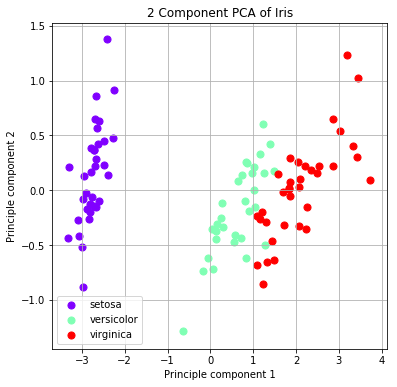

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principle component 1")
ax.set_ylabel("Principle component 2")
ax.set_title("2 Component PCA of Iris")
colors = cm.rainbow(np.linspace(0,1,len(iris.target_names)))
for target_id,target in enumerate(iris.target_names):
    index_v = y_train == target_id
    ax.scatter(prin_comp[index_v,0],prin_comp[index_v,1],c=colors[target_id],cmap='viridis',s=50)
ax.legend(iris.target_names)
ax.axis('tight')
ax.grid()

In [11]:
pca.components_

array([[ 0.3817175 , -0.05769333,  0.84984572,  0.35878333],
       [ 0.63586952,  0.74048919, -0.19257138, -0.10130145]])

In [12]:
pca.mean_

array([5.908, 3.069, 3.807, 1.244])

In [13]:
pca.get_covariance()

array([[ 0.77519012, -0.02640422,  1.45210333,  0.61105657],
       [-0.02640422,  0.15194396, -0.24461151, -0.10558   ],
       [ 1.45210333, -0.24461151,  3.33253884,  1.38586173],
       [ 0.61105657, -0.10558   ,  1.38586173,  0.63668061]])

# K-Nearest Neighbourhood with Cross Validation

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(iris.data,iris.target)
y_knn = knn_model.predict(iris.data)

In [17]:
# Wrong way of cross validation (on training data itself!)
from sklearn.metrics import accuracy_score
accuracy_score(y_knn,iris.target)

1.0

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=iris.target,y_pred=y_knn)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [19]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(iris.data,iris.target,train_size = 0.5,random_state=0)
knn_model.fit(Xtrain,ytrain)
ytest_predict = knn_model.predict(Xtest)
accuracy_score(ytest_predict,ytest)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9066666666666666

In [20]:
confusion_matrix(y_true=ytest,y_pred=ytest_predict)

array([[21,  0,  0],
       [ 0, 28,  2],
       [ 0,  5, 19]], dtype=int64)

## Cross Validation

In [21]:
from sklearn.cross_validation import cross_val_score
cross_val_score(knn_model,iris.data,iris.target,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [22]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(knn_model,iris.data,iris.target,cv=LeaveOneOut(len(iris.data)))
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [23]:
print(scores.mean())

0.96


In [24]:
print(scores.std())

0.19595917942265423
